<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/2_MachineLearning/2_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import Image

# 개요

## 위치



- 머신러닝 > 지도학습 > 분류
  - 분류에 해당하는 알고리즘들의 성능을 평가하는 기준
- 방법
  - [혼동행렬](https://ko.wikipedia.org/wiki/%ED%98%BC%EB%8F%99_%ED%96%89%EB%A0%AC)
    - 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수있는 표이다.
  - 예측값이 실제관측값(정답)과 비교해 얼마나 정확한가

# 혼동행렬

## 요소


- Positive : 긍정적, P
- Negative : 부정적, N
- True : 예측과 실제가 동일, T
- False : 예측과 실제과 상이, F

## case


- 주의사항 : 명제에 대한 실제 상황에 긍정/부정을 고려하지 않고, 텍스트 자체만의 긍/부정을 따지고, 예측과 실제값의 동일/상이 여부만 따지면, 혼동의 상황에서 빠져나갈 수 있다.
- 암이 있다 Positive / 암이 없다 Negative
- TP상황
  - 암이 있다고 예측했는데, 실제로 암이 있었다.
- TN 상황
  - 암이 없다고 예측했는데, 실제로 암이 없었다.
- FP 상황
  - 암이 있다고 예측했는데, 실제로 암이 없었다.
- FN 상황
  - 암이 없다고 예측했는데, 실제로 암이 있었다.

## 평가지표



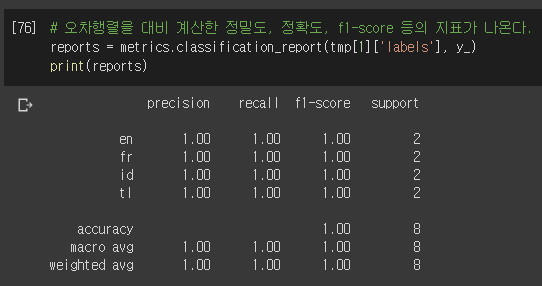

In [3]:
Image('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/etc/2-2.3.png')

# metrics.classification_report()를 통해서 자동계산된다.
# "1_머신러닝/딥러닝 개발-서비스까지 Flow 확인_언어감지서비스.ipynb"에서 사용

- 정밀도 : precision
  - 암이 있다고 예측한 모든것(TP + FP), 실제로 병이 있는 비율 -> 정답률
  - P = TP / (TP+FP)
- 재현율 : recall
  - 실제 암이 있는 전체 데이터 중, **참 긍정 비율**
  - R = TP / (TP + FN)
- F1 score
  - 정밀도와 재현율의 조화 평균
  - F1 = 2 / (1/P + 1/R)
- 특이성
  - 실제 암이 없는 전체 데이터 중, **참 부정 비율**
  - TN / (TN + FP)
- 곡선하 면적
  - 참 긍정 비율과 거짓 긍정 비율 사이의 관계를 기술
  - ROC curve, AUC값(이 값으로 판단하여 가장 좋은 성능을 내는 알고리즘을 찾아낸다. -> 여러 알고리즘 중 가장 성능이 좋은 알고리즘을 선택할 때 사용)
  - 1 - 특이성

## 기타


- 위의 표현은 이진분류일 때 이야기다.
- 다항분류일 때
  - 마이크로 평균
    - 정밀도 = (TP1 + TP2 + ...) / (TP1 + FP1 + ...)
  - 매크로 평균
    - 정밀도 = (개별정밀도1 = 개별정밀도2 + ...) / 총개수

In [4]:
import matplotlib.pyplot as plt
import sklearn.datasets as mls
import pandas as pd

# 연구목표


- ROC, AUC 표현
- 여러 알고리즘 교차로 성능평가

# 데이터 획득


- sklearn에서 제공하는 iris 사용

In [5]:
# 데이터 로드
# mls.fetch_xxx => 데이터가 커서 요청 시 다운로드해 제공
# mls.load_xxx  => scikit-learn이 설치될 때 같이 기본으로 제공
# mls.make_xxx  => 더미 데이터를 임의로 생성해서 제공(가상데이터)
# => 머신러닝 연습용으로 제공되는 데이터셋이다.
tmp = mls.load_iris()
print(tmp.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
tmp.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# 정답 : 0, 1, 2
# 'setosa', 'versicolor', 'virginica'
tmp.target, tmp.target_names, len(tmp.target)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 150)

In [8]:
tmp.data.shape, type(tmp.data)

((150, 4), numpy.ndarray)

# 데이터 준비


- iris 데이터를 데이터프레임으로 구성, 정답은 Series나 df에 포함시켜서 제공

In [9]:
# feature_names을 컬럼명을 사용, data를 데이터로 사용하여 df를 구성하시오
# 실습
tmp_df = pd.DataFrame(tmp.data)
tmp_df.columns = tmp.feature_names
tmp_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# 강의
df = pd.DataFrame(tmp.data, columns=tmp.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# 정답 데이터 추가
# 컬럼명 species, 값 target
# 실습
tmp_df['species'] = tmp.target
tmp_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
# 강의
df['species'] = tmp.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 데이터 분석(생략)

# 모델 구축(성능평가에 집중)


- 여러 알고리즘을 이용하여 학습, 예측, 평가 수행


In [14]:
# 여기서는 여러 알고리즘을 사용
from sklearn.linear_model import LogisticRegression   # 회귀모델인데 분류에서 한번 사용해본다.
from sklearn.tree import DecisionTreeClassifier       # 결정트리분류
from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트분류
from sklearn.naive_bayes import GaussianNB            # 가우시안NB, 원래 자연어처리에 사용하는 것인데 이번에 한번 사용해본다.
from sklearn.svm import SVC                           # 서포트벡터머신 분류

In [15]:
# 도구
import sklearn
from sklearn.metrics import auc, roc_curve            # 곡선하면적으로 알고리즘을 교차로 성능평가
# 데이터를 훈련용과 테스트용으로 나누는 함수
from sklearn.model_selection import train_test_split  # 데이터를 나눈다.

## 데이터 분류


- 훈련용 75, 테스트용 25

In [16]:
df.shape

(150, 5)

In [17]:
# 데이터(feature) (150, 4), 정답(label, class) (150, 1)
# (150, 4)만 추출
# X = df.iloc[:, :4]
# X = df[df.columns[:-1]]
X = df[df.columns[:4]]
X.shape

(150, 4)

In [18]:
# 학습 시 X는 2차원, y는 1차원이다. => y는 X보다 차원이 1개 낮다.
# y = df[df.columns[-1]]
y = df[df.columns[-1]] == 1 #=> 2진 분류, 1이면 참이고 아니면 거짓, 성능평가를 극대화하기 위해 2진 분류로 적용하겠다.
y.shape

(150,)

In [19]:
# random_state : 데이터의 섞임을 항상 일정하게 가겠다. (난수 시드고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 1)
# 테스트 데이터의 비율을 임의로 80%로 배정하였다. (성능평가를 극단적으로 차이나게 하기 위해)
X_train.shape, X_test.shape

((30, 4), (120, 4))

## 성능평가

In [22]:
# 알고리즘 준비   
als = {
    # 키(알고리즘)           : (선의 모양, 알고리즘객체)
    'LogisticRegression'     : ('-', LogisticRegression()                                                ),
    'DecisionTreeClassifier' : ('--',DecisionTreeClassifier(max_depth=5)                                 ),
    'RandomForestClassifier' : ('.-',RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)),
    'GaussianNB'             : (':', GaussianNB()                                                        ),
    'SVC'                    : ('-', SVC()                                                               )
}

In [23]:
# for문으로 돌리겠다. : 알고리즘 선택, 학습, 예측, 성능평가
for al_name, (lineStyle, model) in als.items() :
  # 알고리즘 선택
  # print(al_name, lineStyle, model)
  # 학습
  model.fit(X_train, y_train)
  # 예측
  # 예측 시 확률이 높은 쪽으로 편향되서 예측하는 방법
  pred = model.predict_proba(X_test)
  # 성능평가
  print(type(pred))
  break

<class 'numpy.ndarray'>


In [24]:
# 예측값을 해석해보면
# 분류의 결과는 2개로 나오고, 그런 예측값이 총 120개가 나온다.
# 각각의 값은 T의 확률과 F의 확률이다. T + F = 1.0
# 後 : T, F의 위치 확인 체크
pred.shape, pred[0], sum(pred[0])

((120, 2), array([0.91241711, 0.08758289]), 1.0)

In [25]:
# 데이터 중에 뒤에 값만 취하겠다.
pred_s = pd.Series(pred[:,1])
pred_s

0      0.087583
1      0.509780
2      0.495408
3      0.094216
4      0.399905
         ...   
115    0.217703
116    0.597221
117    0.229257
118    0.538376
119    0.583446
Length: 120, dtype: float64

LogisticRegression 0.6704656463692609
DecisionTreeClassifier 0.932269619016607
RandomForestClassifier 0.9770433083686095
GaussianNB 0.9827417779225008


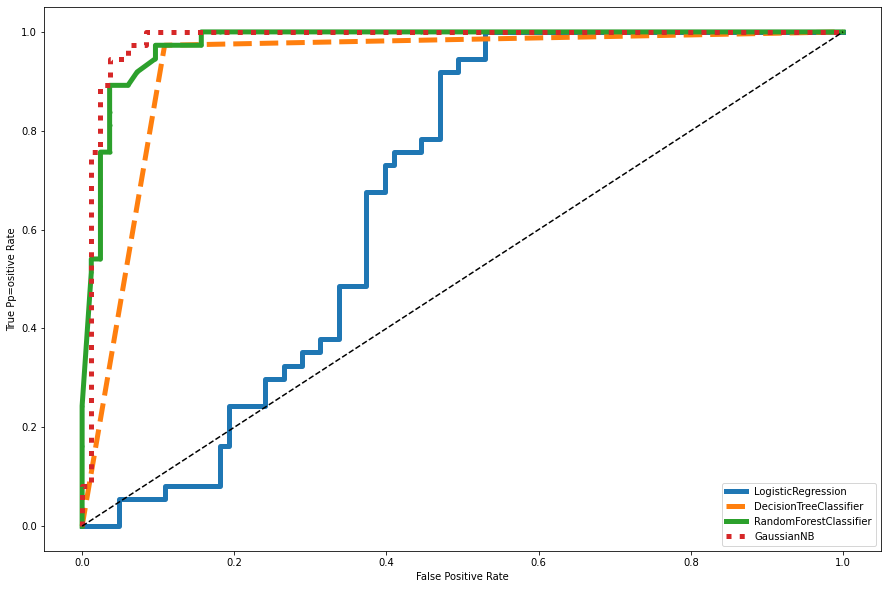

In [26]:
als = {
    'LogisticRegression'    :('-', LogisticRegression()                                                ),
    'DecisionTreeClassifier':('--',DecisionTreeClassifier(max_depth=5)                                 ),
    'RandomForestClassifier':('.-',RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)),
    'GaussianNB'            :(':', GaussianNB()                                                        )
}

plt.figure(figsize = (15, 10))

for al_name, (lineStyle, model) in als.items() :
  model.fit(X_train, y_train)
  pred = model.predict_proba(X_test)
  # 성능평가
  # 예측값 중 1개만(특정 긍정비율만) 선택
  pred_s = pd.Series(pred[:,1])
  # roc커브
  fpr, tpr, _ = roc_curve(y_test, pred_s)
  # 차트 그리기
  plt.plot(fpr, tpr, lineStyle, linewidth = 5, label = al_name)
  # 수치로 확인
  print(al_name, auc(fpr, tpr))

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Pp=ositive Rate')
plt.plot([0,1], [0,1], 'k--')
plt.show()

# 알고리즘들을 평가도구에 의해서 해당 데이터에 좋은 성능을 내는 평가도구로 auc, roc_curve 등을 활용할 수 있다.
# 단, 최적화 도구에서도 교차 검증기법을 이용하여 알고리즘을 찾아낼 수도 있다. (현재 상황은 튜닝하기 전이기 때문)

In [ ]:
# 최적화 : 생략
# 원래라면 AUC값이 높은 RandomForestClassifier, GaussianNB를 후보로 잡고 최적화 진행

In [ ]:
# 덤프 : 생략

# 시스템 통합 및 산출물(생략)